<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_HeartDisease_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.8852
Precision: 0.8788
Recall: 0.9062
F1-Score: 0.8923
AUC Score: 0.9224


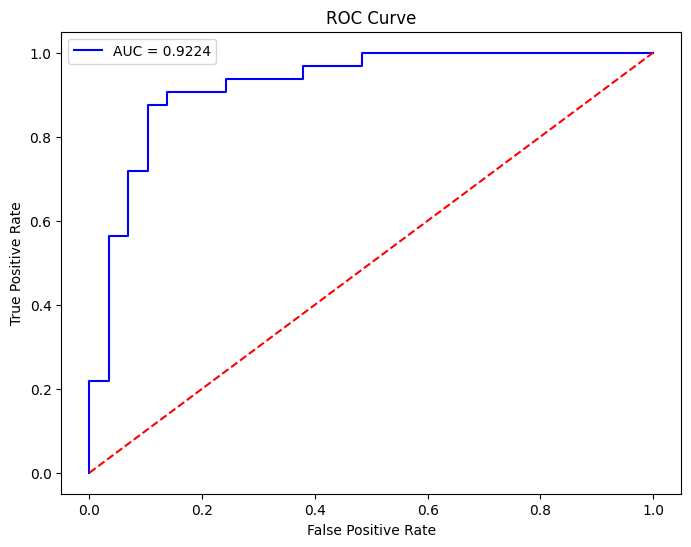

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

df = pd.read_csv("HeartDisease.csv")

df["num"] = (df["num"] > 0).astype(int)

df.fillna(df.median(), inplace=True)

X = df.drop(columns=["num"])
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Persamaan Matematika
##1. Logistic Regression Formula
Model ini menggunakan fungsi sigmoid (logistic function) untuk memprediksi probabilitas kelas. Berikut fungsi sigmoid:

$σ(z) = \frac{1}{1+e^{-z}}$

Di mana:
- $z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$ (persamaan linear)
- $w$ = koefisien (berat) model
- $x$ = fitur input

Model memprediksi  probabilitas dari kelas 1:

$P(Y=1|X) = σ(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)$

Jika  $P(Y=1|X) > 0.5$, maka model mengklasifikasikan sebagai 1 dan jika tidak, sebagai 0. <br><br>

##2. Evaluasi Model
###a) Accuracy
Accuracy digunakan untuk mengukur berapa banyak prediksi yang benar dibandingkan dengan total data:
$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

- TP (True Postive) = data positif yang diklasifikasikan sebagai positif.
- TN (True Negative) = data negatif yang diklasifikasikan sebagai negatif.
- FP (False Positive) = data negatif yang diklasifikasikan sebagai positif.
- FN (False Negative) = data negatif yang diklasifikasikan sebagai negatif. <br><br>

###b)Presicion
digunakan untuk mengukur seberapa banyak prediksi positif yang benar. Semakin tinggi presisi, maka semakin sedikit kesalahan False Positive:

$Precision = \frac{TP}{TP + FP}$ <br><br>

###c) Recall (Sensitivity/True Positive Rate)
digunakan untuk mengukur sebarapa banyak data positif yang benar-benar terdeteksi. Semakin tinggi recall, maka semakin sedikit kesalahan False Negative:

$Recall = \frac{TP}{TP+FN}$ <br><br>

###d) F1-Score
F1-Score merupakan rata-rata harmonik antara precision dan recall. F1-Score digunakan saat kita ingin menyeimbangkan precision & recall.

$F1 = 2 \times\frac{Precision\times Recall}{Precision+Recall}$ <br><br>

###e) Area Under the Curve (AUC - ROC)
AUC mengukur seberapa baik model memisahkan kela 0 dan 1. Sedangkan, ROC (Receiver Operating Characteristic) Curve adalah plot True Positive Rate (TPR) vs False Positive Rate (FPR). Semakin besar AUC mendekati 1.0, maka semakin baik modelnya:

- $TPR = \frac{TP}{TP+FN}$
- $FPR = \frac{FP}{FP+TN}$

